<b> Overveiw

The project aims to identify the level of risk and potential customer of banking product which are default rate, housing loan, term deposit, and personal loan. The input of the project is a bank marketing data set from https://www.kaggle.com/janiobachmann/bank-marketing-dataset. The data is used to identify the potential customer to subscribe to a term deposit in a marketing campaign. the data set consists of 17 features and 11162 rows including a target variable.
According to the project, the objective of the project is different from the original purpose. the selection of the features is applied to be an example of the initial screening of potential customer of banking products. The selection of features is the general characteristics of individual including age, education, marital status, and range of account's balance. the data will apply the classification method to predict the percentage that an individual will subscribe to each banking product.

<b> Objective

-predictive analysis of the potential customer that has a higher chance to subscribe to the banking product(personal loan, housing loan, and term deposit)

-identify the risk of default of individual based on general characteristics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier ,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb
import dill


# EDA 1

In [2]:
# read the csv file that contain in the same folder in the notebook
df= pd.read_csv('bank.csv')

In [3]:
# look at the shape of the data set
df.shape

(11162, 17)

In [4]:
# look at the head of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# select only the feature that has potential to fill with the customer and the target.
data=df[['age','job','marital','education','balance','default', 'housing','deposit','loan']]

## EDA for the individual column

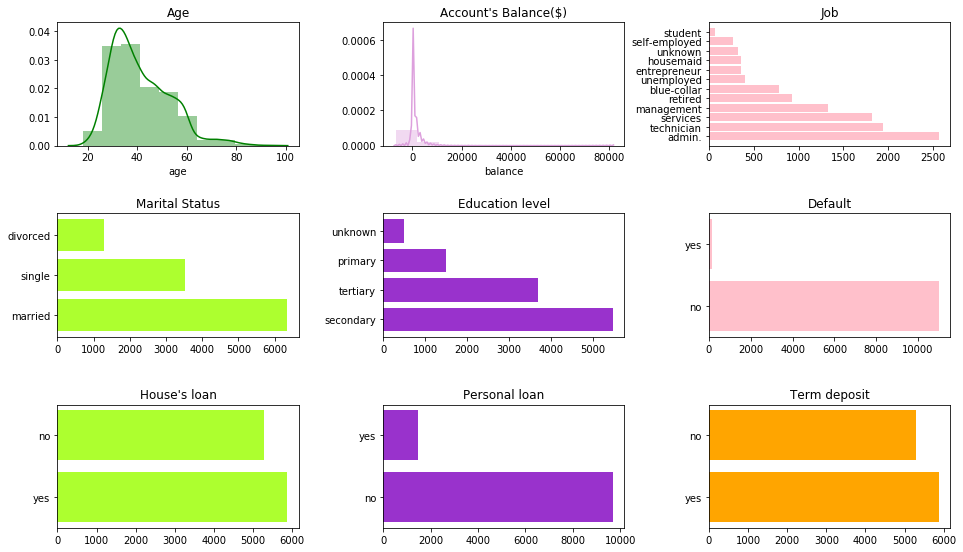

In [6]:
# plot the individual column to display the value 
fig = plt.figure(figsize=(16,9))
plt.subplot(3, 3,1)# use subplot to plot all the figures
sns.distplot(data['age'],bins=10,color='green')# use bins to display age 
plt.title("Age")
plt.subplot(3, 3,2)
sns.distplot(data['balance'],bins=10,color='plum')
plt.title("Account's Balance($)")
plt.subplot(3, 3,3)
plt.barh(data['job'].unique(),df['job'].value_counts(),color='pink')
plt.title("Job")
plt.subplot(3, 3,4)
plt.barh(data['marital'].unique(),df['marital'].value_counts(),color='greenyellow')
plt.title("Marital Status")
plt.subplot(3, 3,5)
plt.barh(data['education'].unique(),df['education'].value_counts(),color='darkorchid')
plt.title("Education level")
plt.subplot(3, 3,6)
plt.barh(data['default'].unique(),df['default'].value_counts(),color='pink')
plt.title("Default")
plt.subplot(3, 3,7)
plt.barh(data['housing'].unique(),df['housing'].value_counts(),color='greenyellow')
plt.title("House's loan")
plt.subplot(3, 3,8)
plt.barh(data['loan'].unique(),df['loan'].value_counts(),color='darkorchid')
plt.title("Personal loan")
plt.subplot(3, 3,9)
plt.barh(data['deposit'].unique(),df['deposit'].value_counts(),color='orange')
plt.title("Term deposit")

plt.subplots_adjust(wspace=0.35, bottom=0.1,hspace=0.55)

According to the graph above, the data has  shown that:

1. Majority of the age is between 30-40.
2. There are some of the individuals whose balance is negative. Impute of the data may be appiled
3. There are unknown class in Job and Education columns which I think it might not be useful for the analysis
5. The rate of default is very low and may result as the imbalance of the result which can be affect of the prediction. 
6. The same problem happen in personal loan which will affect the result and analysis of the data.

<b> Insight of each data column

1. gernerally, the dafault rate is low
2. people tend to have a term deposit and housing loan rather than a personal loan which term deposit will help improve self-discipline of savings and housing loan is the most common goal of an individual to have their own house.
3. The majority of the sample group tend to graduate at least secondary school
4. The majority of the sample group work as an admin
5. The majority of the sample group are married

## EDA of the features

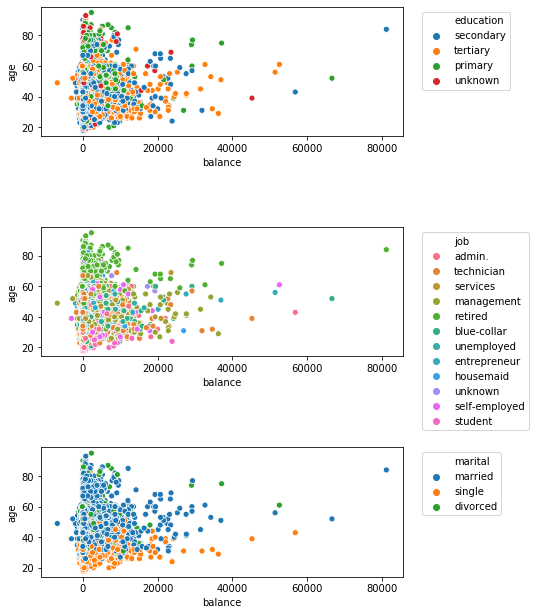

In [7]:
fig = plt.figure(figsize=(24,9))
plt.subplot(3, 3,1)
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['education'])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.subplot(3, 3,4)
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['job'])
plt.legend(bbox_to_anchor=(1.04,1), loc="best")
plt.subplot(3, 3,7)
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['marital'])
plt.legend(bbox_to_anchor=(1.04,1), loc="best")
plt.subplots_adjust(wspace=0.35, bottom=0,hspace=0.7)

According to the graph above, There are no obvious relationship between balance, age, marital, eduation, and job.
The rule of thumb apply in these graph as the retired people will be a person who older than 60.

## EDA of target

Balance and age & targets(default, personal loan, term deposit, housing loan)

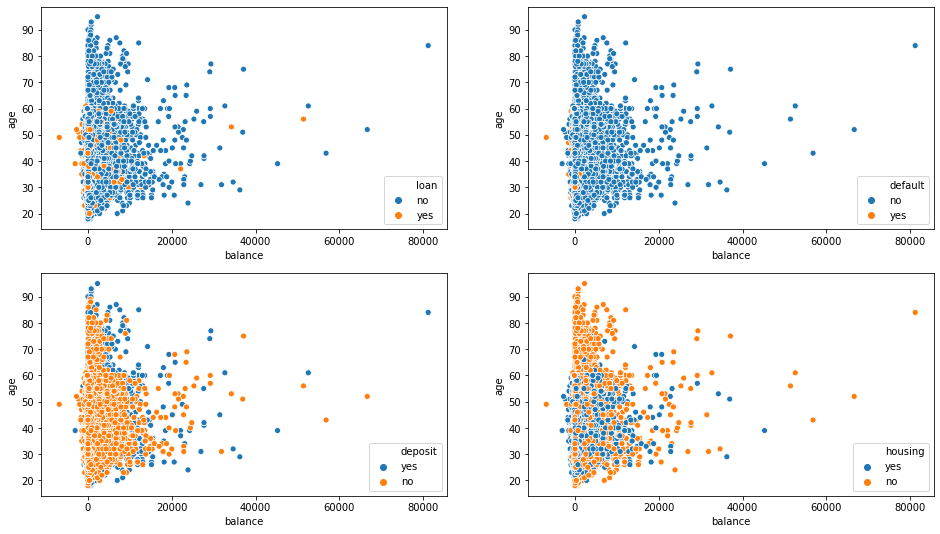

In [8]:
fig = plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['loan'])
plt.subplot(2,2,2)
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['default'])
plt.subplot(2,2,3)
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['deposit'])
plt.subplot(2,2,4)
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['housing'])

Insight
- People that have balance more than $10,000 will not have a default status. It might be interpreted as they have income enough to save money.
- People do not subscribe to the personal loan as they are older than 60(retired)
- Majority of people will completely repay their housing loan as they are retired. (60 years old)
- Older people still have saving behaviour even they are retired.

#### Education and target

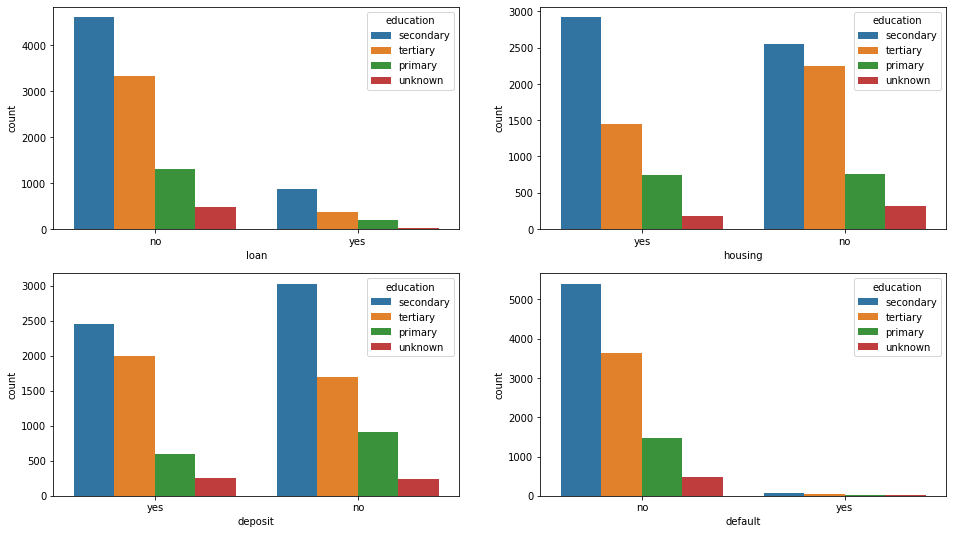

In [9]:
fig = plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.countplot(x='loan', hue='education',data=df)
plt.subplot(2,2,2)
sns.countplot(x='housing', hue='education',data=df)
plt.subplot(2,2,3)
sns.countplot(x='deposit', hue='education',data=df)
plt.subplot(2,2,4)
sns.countplot(x='default', hue='education',data=df)

Insight
- People that has balance more than $10,000 will not have a default status. It might be interpret as they has income enough to save money.
- People don't subscribe the personal as they are older than 60(retired)
- Majority of people will completely repay their housing loan as they are retired.(*****)
- Older people still have saving behaviour even they are retired.


#### Job & targets

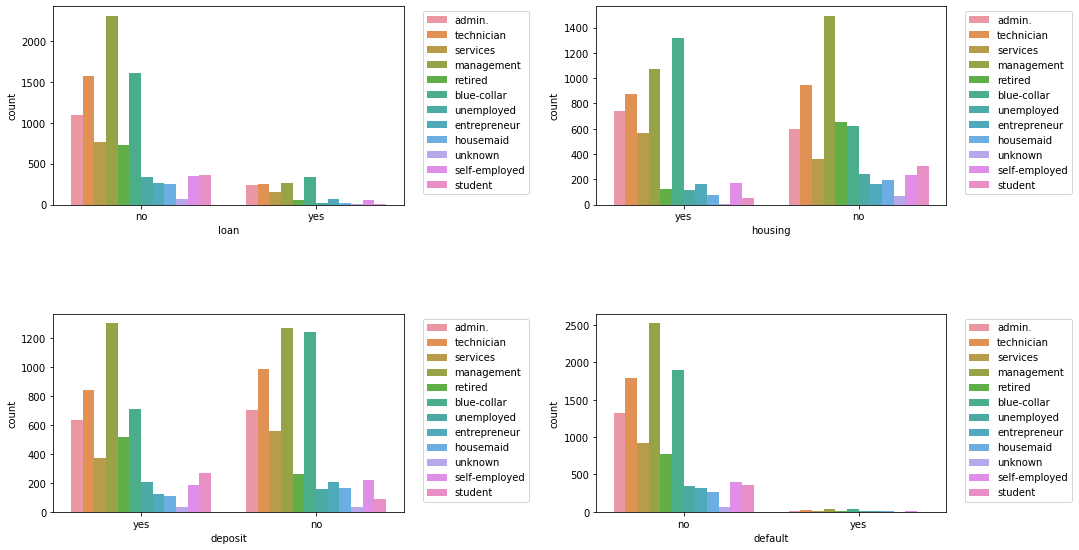

In [10]:
fig = plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.countplot(x='loan', hue='job',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="best")
plt.subplot(2,2,2)
sns.countplot(x='housing', hue='job',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="best")
plt.subplot(2,2,3)
sns.countplot(x='deposit', hue='job',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="best")
plt.subplot(2,2,4)
sns.countplot(x='default', hue='job',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.subplots_adjust(wspace=0.55, bottom=0.1,hspace=0.55)

#### Marital status & targets

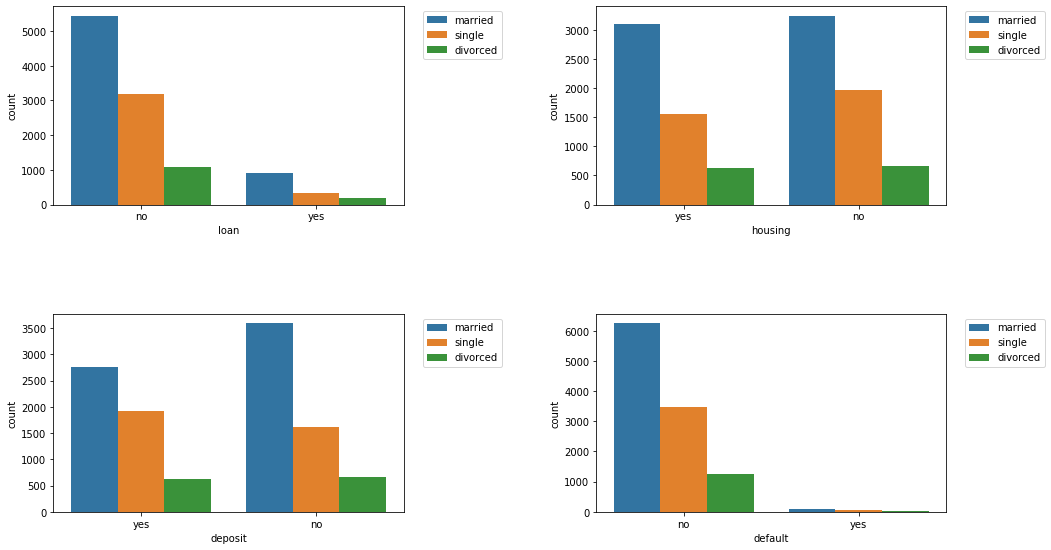

In [11]:
fig = plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.countplot(x='loan', hue='marital',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.subplot(2,2,2)
sns.countplot(x='housing', hue='marital',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.subplot(2,2,3)
sns.countplot(x='deposit', hue='marital',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.subplot(2,2,4)
sns.countplot(x='default', hue= 'marital',data=df)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.subplots_adjust(wspace=0.55, bottom=0.1,hspace=0.55)

# Data cleaning

### negative balance

First of all, the exploratory data analysis told that there are negative balance account in the data set. Let's have a look at the specific criteria

In [12]:
# check out the balance columns that negative
negative_bal= data.loc[data['balance'] < 0]

In [13]:
negative_bal.shape

(688, 9)

There are 688 persons that has a negative balance

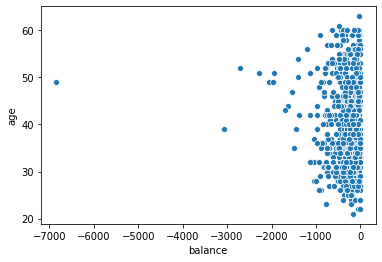

In [14]:
sns.scatterplot(x='balance', y='age',data= negative_bal)

The 668 persons distributes in all ages

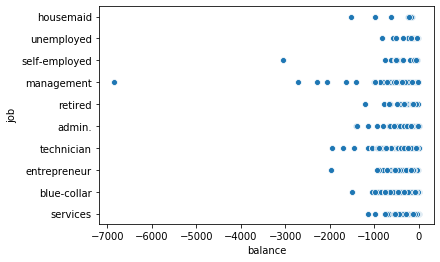

In [15]:
sns.scatterplot(x='balance', y='job',data= negative_bal)

and also occur in the job

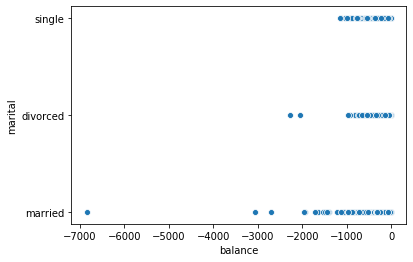

In [16]:
sns.scatterplot(x='balance', y='marital',data= negative_bal)

same as marital status

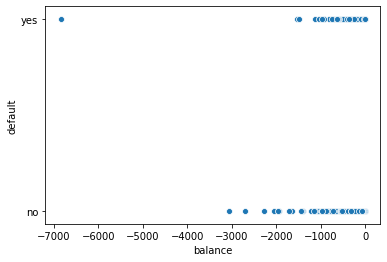

In [17]:
sns.scatterplot(x='balance', y='default',data= negative_bal)

Moreover, I assume that the negative balance will affect the possibility of default. the above has shown that there are no relation or low realtion to the default posibility

In summary, I decided to put the account balance into ragne which will be explained in the later section

### drop unknown education

Next, there are job type and education type named 'unknown' which will not be beneficial in my analysis. So I decided to drop these type of feature.

In [18]:
data = data.loc[data['education']!='unknown']
data = data.loc[data['job']!='unknown']

In [19]:
data.education.value_counts()

secondary    5461
tertiary     3680
primary      1493
Name: education, dtype: int64

In [20]:
data.job.value_counts()

management       2482
blue-collar      1858
technician       1771
admin.           1294
services          882
retired           731
self-employed     394
unemployed        350
entrepreneur      314
student           293
housemaid         265
Name: job, dtype: int64

In [21]:
data

,age,job,marital,education,balance,default,housing,deposit,loan
0,59,admin.,married,secondary,2343,no,yes,yes,no
1,56,admin.,married,secondary,45,no,no,yes,no
2,41,technician,married,secondary,1270,no,yes,yes,no
3,55,services,married,secondary,2476,no,yes,yes,no
4,54,admin.,married,tertiary,184,no,no,yes,no
...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,no,yes,no,no
11158,39,services,married,secondary,733,no,no,no,no
11159,32,technician,single,secondary,29,no,no,no,no
11160,43,technician,married,secondary,0,no,no,no,yes


the size reduce from 11162 to 10634

### seperate age and balance into bins

In this section, I use cut method to assign the bin the the range of values:

1. age will divided into 6 bins:

    1.1 age 18-29
    
    1.2 age 30-39
    
    1.3 age 40-49
    
    1.4 age 50-59
    
    1.5 age 60-69
    
    1.6 age 70+
    
the age is bins into every 10 years and put it as the categorical values

2. the balance will divided into:
    2.1 negative-0
    
    2.2 0-1000
    
    2.3 1000-9999
    
    2.4 10000-19999
    
    2.5 20000-49999
    
    2.6 50000+

In [22]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['age'] = pd.cut(data.age, bins, labels = labels,include_lowest = True)
bins = [-10000, 0, 1000, 10000, 20000, 50000,10000000]
labels = ['0', '1-999', '1000-9999','10000-19999', '20000-49999', '50000+']
data['balance'] = pd.cut(data.balance, bins, labels = labels,include_lowest = True)

In [23]:
data

,age,job,marital,education,balance,default,housing,deposit,loan
0,50-59,admin.,married,secondary,1000-9999,no,yes,yes,no
1,50-59,admin.,married,secondary,1-999,no,no,yes,no
2,40-49,technician,married,secondary,1000-9999,no,yes,yes,no
3,50-59,services,married,secondary,1000-9999,no,yes,yes,no
4,50-59,admin.,married,tertiary,1-999,no,no,yes,no
...,...,...,...,...,...,...,...,...,...
11157,30-39,blue-collar,single,primary,1-999,no,yes,no,no
11158,30-39,services,married,secondary,1-999,no,no,no,no
11159,30-39,technician,single,secondary,1-999,no,no,no,no
11160,40-49,technician,married,secondary,0,no,no,no,yes


In [24]:
data.dtypes

age          category
job            object
marital        object
education      object
balance      category
default        object
housing        object
deposit        object
loan           object
dtype: object

In [25]:
data=data.astype({'age': 'object','balance': 'object'})

change the data type of bins to objecy as it automatically change to category from the cut method

In [26]:
data.dtypes

age          object
job          object
marital      object
education    object
balance      object
default      object
housing      object
deposit      object
loan         object
dtype: object

In [27]:
data.balance.unique()

array(['1000-9999', '1-999', '0', '10000-19999', '20000-49999', '50000+'],
      dtype=object)

In [28]:
data.age.value_counts()

30-39    4073
40-49    2349
18-29    1927
50-59    1732
60-69     312
70+       241
Name: age, dtype: int64

# EDA 2

In [29]:
data

,age,job,marital,education,balance,default,housing,deposit,loan
0,50-59,admin.,married,secondary,1000-9999,no,yes,yes,no
1,50-59,admin.,married,secondary,1-999,no,no,yes,no
2,40-49,technician,married,secondary,1000-9999,no,yes,yes,no
3,50-59,services,married,secondary,1000-9999,no,yes,yes,no
4,50-59,admin.,married,tertiary,1-999,no,no,yes,no
...,...,...,...,...,...,...,...,...,...
11157,30-39,blue-collar,single,primary,1-999,no,yes,no,no
11158,30-39,services,married,secondary,1-999,no,no,no,no
11159,30-39,technician,single,secondary,1-999,no,no,no,no
11160,40-49,technician,married,secondary,0,no,no,no,yes


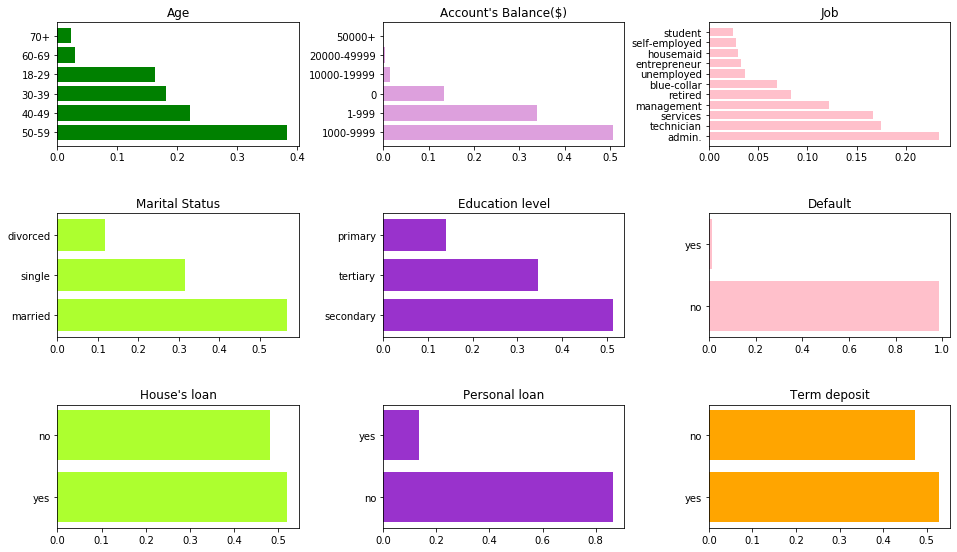

In [30]:
fig = plt.figure(figsize=(16,9))
plt.subplot(3, 3,1)
plt.barh(data['age'].unique(),data['age'].value_counts(normalize=True),color='green')
plt.title("Age")
plt.subplot(3, 3,2)
plt.barh(data['balance'].unique(),data['balance'].value_counts(normalize=True),color='plum')
plt.title("Account's Balance($)")
plt.subplot(3, 3,3)
plt.barh(data['job'].unique(),data['job'].value_counts(normalize=True),color='pink')
plt.title("Job")
plt.subplot(3, 3,4)
plt.barh(data['marital'].unique(),data['marital'].value_counts(normalize=True),color='greenyellow')
plt.title("Marital Status")
plt.subplot(3, 3,5)
plt.barh(data['education'].unique(),data['education'].value_counts(normalize=True),color='darkorchid')
plt.title("Education level")
plt.subplot(3, 3,6)
plt.barh(data['default'].unique(),data['default'].value_counts(normalize=True),color='pink')
plt.title("Default")
plt.subplot(3, 3,7)
plt.barh(data['housing'].unique(),data['housing'].value_counts(normalize=True),color='greenyellow')
plt.title("House's loan")
plt.subplot(3, 3,8)
plt.barh(data['loan'].unique(),data['loan'].value_counts(normalize=True),color='darkorchid')
plt.title("Personal loan")
plt.subplot(3, 3,9)
plt.barh(data['deposit'].unique(),data['deposit'].value_counts(normalize=True),color='orange')
plt.title("Term deposit")

plt.subplots_adjust(wspace=0.35, bottom=0.1,hspace=0.55)

# SEGMENTATION

# Data Cleaning 2

In [32]:
clean_data=pd.get_dummies(data=data,prefix=data.columns,prefix_sep='_',drop_first=True)

In [33]:
clean_data

,age_30-39,age_40-49,age_50-59,age_60-69,age_70+,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_tertiary,balance_1-999,balance_1000-9999,balance_10000-19999,balance_20000-49999,balance_50000+,default_yes,housing_yes,deposit_yes,loan_yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11158,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11159,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11160,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
X=clean_data.drop(columns=['housing_yes', 'deposit_yes', 'loan_yes','default_yes'])
y=clean_data.housing_yes
y2=clean_data.deposit_yes
y3=clean_data.loan_yes

Use panda to get dummies from all variable and drop the first columns to eliminate the redundency of the data

# Feature selection using RFECV

In this section, RFECV is applied to select the best features

In [35]:

from sklearn.feature_selection import RFECV
# define function rfecv and take 3 parameters 
def rfecv(X,y, estimator= LogisticRegression()):
    selector = RFECV(estimator, step=1, cv=5)
    selector = selector.fit(X, y)
    
    ranking= selector.ranking_# define the ranking from RFECV
    
    columns= X.columns
    # create dataframe by using ranking and columns name of X 
    rank= pd.DataFrame(data= [ranking], columns=columns).T.sort_values(by=0, ascending= True,)
    rank

    best_col=[]
    for ranks in range(len(rank)):
        if rank.values[ranks][0]==1:
            best_col.append(rank.index[ranks])
    
    return best_col

### set target  and feature variables

In [36]:
# define feature by drop column: housing, deposit, loan, and default
# the features will be used as the target variables
X=clean_data.drop(columns=['housing_yes', 'deposit_yes', 'loan_yes','default_yes'])
y1=clean_data.housing_yes
y2=clean_data.deposit_yes
y3=clean_data.loan_yes
y4=clean_data.default_yes

len(X.columns)

24

Use recursive features elimination to select features from the X and assign it to variable X1, X2, X3 and house, deposit, loan based on the method using and target variables respectively.  

In [37]:

X_train, X_test, y_train, y_test=train_test_split(X,y1, random_state=42, test_size=0.3)

print("Housing loan")
X1_house=X[rfecv(X_train,y_train, estimator= LogisticRegression())]
print("RFECV selects " +str(len(X1_house.columns))+ " from 24 features by using LogisticRegression" )
X2_house=X[rfecv(X_train,y_train, estimator= xgb.XGBClassifier())]
print("RFECV selects " +str(len(X2_house.columns))+ " from 24 features by using XGBClassifier" )
X3_house=X[rfecv(X_train,y_train, estimator= svm.SVC(kernel='linear'))]
print("RFECV selects " +str(len(X3_house.columns))+ " from 24 features by using SVC" )

# for the first target with LogisticRegression RFECV reduce from 24 features to 18 features 
print("Term deposit loan")
X_train, X_test, y_train, y_test=train_test_split(X,y2, random_state=42, test_size=0.3)
X1_deposit=X[rfecv(X_train,y_train, estimator= LogisticRegression())]
print("RFECV selects " +str(len(X1_deposit.columns))+ " from 24 features by using LogisticRegression" )
X2_deposit=X[rfecv(X_train,y_train, estimator= xgb.XGBClassifier())]
print("RFECV selects " +str(len(X2_deposit.columns))+ " from 24 features by using XGBClassifier" )
X3_deposit=X[rfecv(X_train,y_train, estimator= svm.SVC(kernel='linear'))]
print("RFECV selects " +str(len(X3_deposit.columns))+ " from 24 features by using SVC" )



print("Personal loan")
X_train, X_test, y_train, y_test=train_test_split(X,y3, random_state=42, test_size=0.3)
X1_loan=X[rfecv(X_train,y_train, estimator= LogisticRegression())]
print("RFECV selects " +str(len(X1_loan.columns))+ " from 24 features by using LogisticRegression" )
X2_loan=X[rfecv(X_train,y_train, estimator= xgb.XGBClassifier())]
print("RFECV selects " +str(len(X2_loan.columns))+ " from 24 features by using XGBClassifier" )
X3_loan=X[rfecv(X_train,y_train, estimator= svm.SVC(kernel='linear'))]
print("RFECV selects " +str(len(X3_loan.columns))+ " from 24 features by using SVC" )


Housing loan
RFECV selects 18 from 24 features by using LogisticRegression
RFECV selects 14 from 24 features by using XGBClassifier
RFECV selects 8 from 24 features by using SVC
Term deposit loan
RFECV selects 20 from 24 features by using LogisticRegression
RFECV selects 13 from 24 features by using XGBClassifier
RFECV selects 23 from 24 features by using SVC
Personal loan
RFECV selects 1 from 24 features by using LogisticRegression
RFECV selects 1 from 24 features by using XGBClassifier
RFECV selects 1 from 24 features by using SVC


# Modeling

In this section, the classification method will be applied to the individual data set.

Firstly, I will draw the baseline based on the many classification methods and the original data without feature selection or oversampling technique

Then, XGBoost, Logistic regression, and SVM are choosen because these method did a outstanding score compared to the others method. Even the gradient Boosting also make a outstanding score, I decided to choose only XGBoost as the boosting method to explore and improve the model.

In [38]:
clean_data

,age_30-39,age_40-49,age_50-59,age_60-69,age_70+,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_tertiary,balance_1-999,balance_1000-9999,balance_10000-19999,balance_20000-49999,balance_50000+,default_yes,housing_yes,deposit_yes,loan_yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11158,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11159,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11160,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## model 1 (y1) prediction of housing loan subscription 

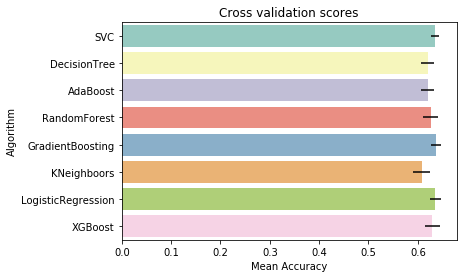

In [39]:
# Modeling step Test differents algorithms 

X_train, X_test, y_train, y_test=train_test_split(X,y1, random_state=42, test_size=0.3)
kfold = StratifiedKFold(n_splits=10)
random_state = 42
classifiers = []
classifiers.append(svm.SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))



cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","KNeighboors","LogisticRegression","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")





### XG Boost

#### XGBoost function

In [40]:
def xgbClassifier(X_train, X_test, y_train, y_test):
    xgb_clf = xgb.XGBClassifier()
    xgb_clf.fit(X_train,y_train)
    y_train_preds = xgb_clf.predict(X_train)
    y_test_preds = xgb_clf.predict(X_test)

    print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))
    print(classification_report(y_test, y_test_preds))
    columns=X_train.columns.to_list()

    importance=xgb_clf.feature_importances_.tolist()
    importance_data=pd.DataFrame(data=[importance],columns=columns,index=['feature_importance']).T
    
    cm=confusion_matrix(y_test, y_test_preds)

    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');


    return importance_data.sort_values('feature_importance', ascending= False).plot(kind='bar')
    

#### run the xgboost classifier with the original cleaning data(X) and  target of housing loan (y1)

XGB accuracy score for train: 0.678: test: 0.634
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1685
           1       0.61      0.63      0.62      1506

    accuracy                           0.63      3191
   macro avg       0.63      0.63      0.63      3191
weighted avg       0.63      0.63      0.63      3191



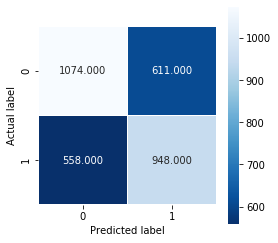

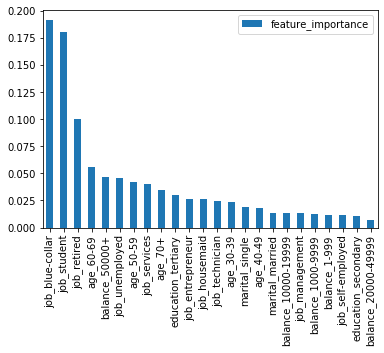

In [41]:
# do the test and train split for X and y1(housing loan)

X_train, X_test, y_train, y_test=train_test_split(X,y1, random_state=42, test_size=0.3)
# apply the xgb function with the test and train data
xgbClassifier(X_train, X_test, y_train, y_test)

#### run the xgboost classifier again with the feature selection data(X2_house) and  target of housing loan (y1)

XGB accuracy score for train: 0.644: test: 0.634
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1685
           1       0.63      0.56      0.59      1506

    accuracy                           0.63      3191
   macro avg       0.63      0.63      0.63      3191
weighted avg       0.63      0.63      0.63      3191



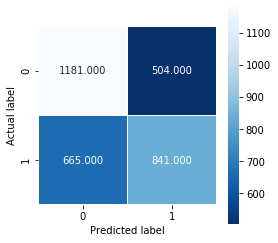

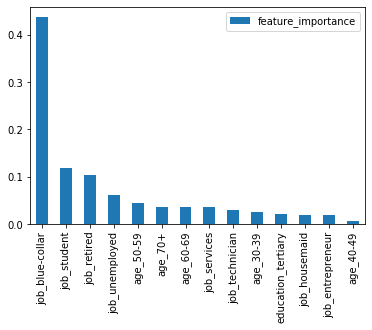

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X2_house,y1, random_state=42, test_size=0.3)
xgbClassifier(X_train, X_test, y_train, y_test)

### Logistic regression

#### Logistic regression function

In [43]:
def lrregression(X_train, X_test, y_train, y_test):
    lr= LogisticRegression(max_iter=500)
    lr.fit(X_train,y_train)
    y_train_preds = lr.predict(X_train)
    y_test_preds = lr.predict(X_test)
    
    print('LogisticRegression accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))
    print(classification_report(y_test, y_test_preds))
    columns=X_train.columns.to_list()

    importance=lr.coef_.tolist()
    
    importance_data=pd.DataFrame(data=importance,columns=columns,index=['feature_importance']).T
    
    cm=confusion_matrix(y_test, y_test_preds)

    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

    return importance_data.sort_values('feature_importance', ascending= False).plot(kind='bar')


#### run the logistic regression with the original cleaning data(X) and  target of housing loan (y1)

LogisticRegression accuracy score for train: 0.640: test: 0.635
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1685
           1       0.61      0.62      0.62      1506

    accuracy                           0.63      3191
   macro avg       0.63      0.63      0.63      3191
weighted avg       0.63      0.63      0.63      3191



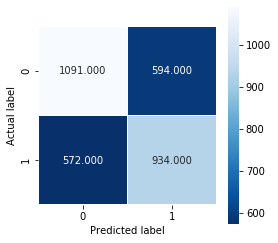

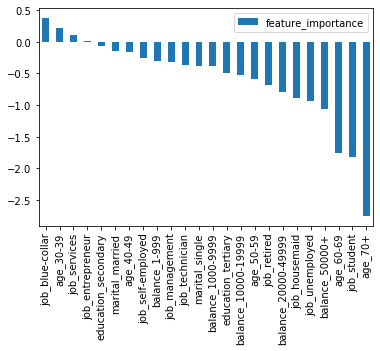

In [44]:
# use 
X_train, X_test, y_train, y_test=train_test_split(X,y1, random_state=42, test_size=0.3)
lrregression(X_train, X_test, y_train, y_test)

#### run the logistic regression again with the the feature selection data(X1_house)  and  target of housing loan (y1)

LogisticRegression accuracy score for train: 0.642: test: 0.636
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1685
           1       0.62      0.61      0.61      1506

    accuracy                           0.64      3191
   macro avg       0.64      0.64      0.64      3191
weighted avg       0.64      0.64      0.64      3191



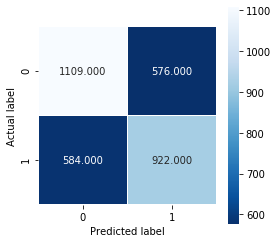

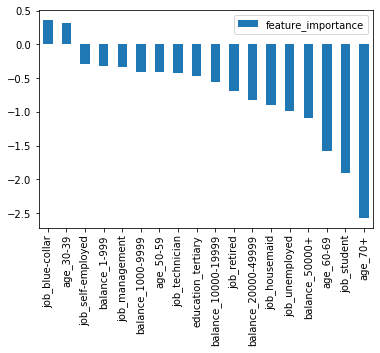

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X1_house,y1, random_state=42, test_size=0.3)

lrregression(X_train, X_test, y_train, y_test)

### SVM

#### SVM function

In [46]:
def SVC(X_train, X_test, y_train, y_test):
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train,y_train)
    
    y_train_preds = clf.predict(X_train)
    y_test_preds = clf.predict(X_test)

    print('SVC accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))
    print(classification_report(y_test, y_test_preds))
    columns=X_train.columns.to_list()

    importance=clf.coef_.tolist()
    importance_data=pd.DataFrame(data=importance,columns=columns,index=['feature_importance']).T
    
    cm=confusion_matrix(y_test, y_test_preds)

    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    
    return importance_data.sort_values('feature_importance', ascending= False).plot(kind='bar')
    

#### run the SVM with the original cleaning data(X) and  target of housing loan (y1)

SVC accuracy score for train: 0.624: test: 0.607
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1685
           1       0.60      0.51      0.55      1506

    accuracy                           0.61      3191
   macro avg       0.61      0.60      0.60      3191
weighted avg       0.61      0.61      0.60      3191



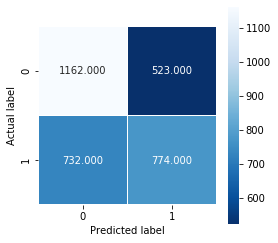

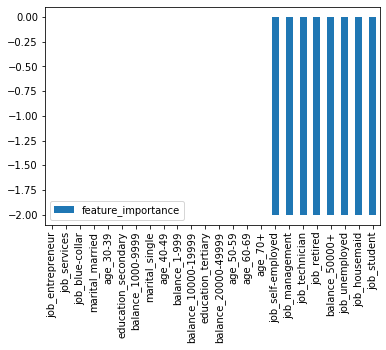

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X,y1, random_state=42, test_size=0.3)
SVC(X_train, X_test, y_train, y_test)

#### run the SVM again with the the feature selection data(X3_house)  and  target of housing loan (y1)

SVC accuracy score for train: 0.624: test: 0.607
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1685
           1       0.60      0.51      0.55      1506

    accuracy                           0.61      3191
   macro avg       0.61      0.60      0.60      3191
weighted avg       0.61      0.61      0.60      3191



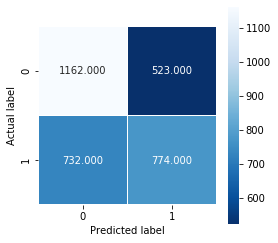

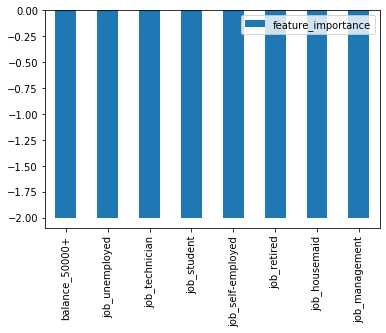

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X3_house,y1, random_state=42, test_size=0.3)
SVC(X_train, X_test, y_train, y_test)

### Gridsearch

In [49]:
# def Gridsearch(Model, param):
#     gs= GridSearchCV(Model, param_grid= param, scoring="accuracy", verbose = 1)
#     gs.fit(X_train,y_train)
#     best = gs.best_estimator_
#     return (gs.best_score_,best)


In [50]:
# xgb_clf=xgb.XGBClassifier()
# xgboost_params={
#     # Parameters that we are going to tune.
#     'max_depth':[6,11],
#     'min_child_weight': [1,7],
#     'eta':[.3,0.01],
#     'subsample': [1],
#     'colsample_bytree': [1,0.9],
#     # Other parameters
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]}
# Gridsearch(xgb_clf,xgboost_params)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  6.6min finished


(0.6231360623063757,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
               gpu_id=-1, importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=60, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

In [51]:
# lr_params = {
#     'penalty':['l1','l2'],
#     'solver':['liblinear'],
#     'C':np.logspace(-5,0,100)
# }

# Gridsearch(lr,lr_params)

NameError: name 'lr' is not defined

In [ ]:
# svc_param_grid = {'kernel': ['linear','rbf'], 
#                   'gamma': [ 0.001, 0.01, 0.1, 1],
#                   'C': [1, 10, 50, 100,200]}

# Gridsearch(clf,svc_param_grid)

## model 2 (y2) prediction of term deposit 

#### baseling of term_deposit subscription

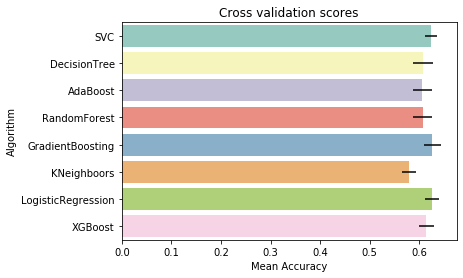

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X,y2, random_state=42, test_size=0.3)
# Modeling step Test differents algorithms 
kfold = StratifiedKFold(n_splits=10)
random_state = 42
classifiers = []
classifiers.append(svm.SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))



cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","KNeighboors","LogisticRegression","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

### XG Boost

#### run the xgboost classifier with the original cleaning data(X) and  target of term deposit subscription (y2)


XGB accuracy score for train: 0.662: test: 0.606
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1675
           1       0.60      0.52      0.56      1516

    accuracy                           0.61      3191
   macro avg       0.60      0.60      0.60      3191
weighted avg       0.61      0.61      0.60      3191



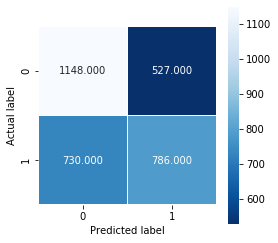

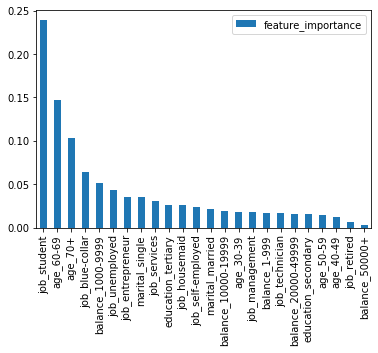

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X,y2, random_state=42, test_size=0.3)
xgbClassifier(X_train, X_test, y_train, y_test)

#### run the xgboost classifier again with the feature selection data(X2_deposit) and  term deposit subscription (y2)


XGB accuracy score for train: 0.630: test: 0.597
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1675
           1       0.59      0.48      0.53      1516

    accuracy                           0.60      3191
   macro avg       0.60      0.59      0.59      3191
weighted avg       0.60      0.60      0.59      3191



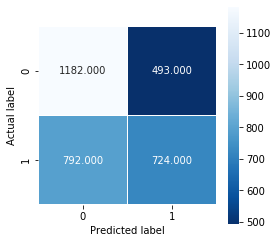

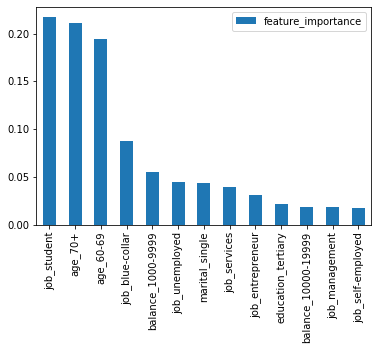

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X2_deposit,y2, random_state=42, test_size=0.3)
xgbClassifier(X_train, X_test, y_train, y_test)

### Logistic regression


#### run the Logistic regression with the original cleaning data(X) and  target of term deposit subscription (y2)



LogisticRegression accuracy score for train: 0.630: test: 0.599
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1675
           1       0.60      0.48      0.53      1516

    accuracy                           0.60      3191
   macro avg       0.60      0.59      0.59      3191
weighted avg       0.60      0.60      0.59      3191



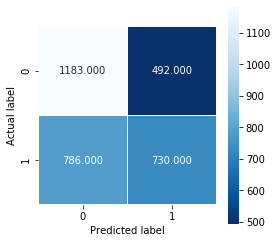

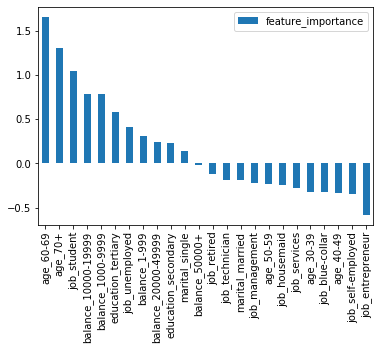

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y2, random_state=42, test_size=0.3)

lrregression(X_train, X_test, y_train, y_test)

#### run the Logistic regression again with the feature selection data(X1_deposit) and  term deposit subscription (y2)


LogisticRegression accuracy score for train: 0.625: test: 0.601
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1675
           1       0.61      0.44      0.51      1516

    accuracy                           0.60      3191
   macro avg       0.60      0.59      0.59      3191
weighted avg       0.60      0.60      0.59      3191



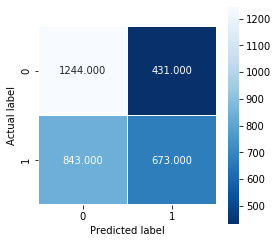

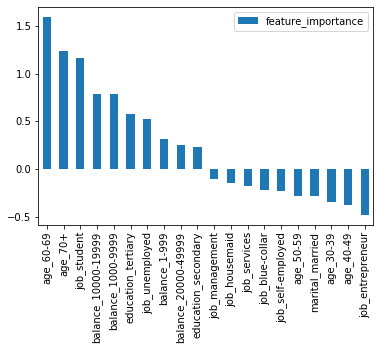

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X1_deposit,y2, random_state=42, test_size=0.3)
lrregression(X_train, X_test, y_train, y_test)

### SVM- SVC

#### run the SVC with the original cleaning data(X) and  target of term deposit subscription (y2)


SVC accuracy score for train: 0.615: test: 0.578
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      1675
           1       0.57      0.44      0.50      1516

    accuracy                           0.58      3191
   macro avg       0.58      0.57      0.57      3191
weighted avg       0.58      0.58      0.57      3191



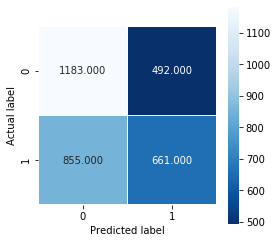

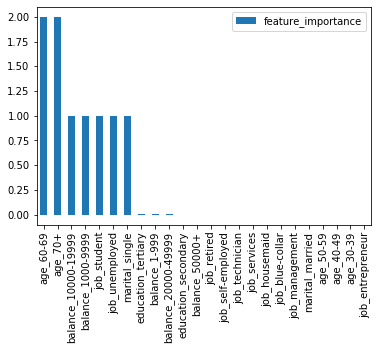

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y2, random_state=42, test_size=0.3)
SVC(X_train, X_test, y_train, y_test)

#### run the SVC again with the feature selection data(X3_deposit) and  term deposit subscription (y2)


SVC accuracy score for train: 0.615: test: 0.584
              precision    recall  f1-score   support

           0       0.58      0.73      0.65      1675
           1       0.59      0.42      0.49      1516

    accuracy                           0.58      3191
   macro avg       0.59      0.58      0.57      3191
weighted avg       0.59      0.58      0.57      3191



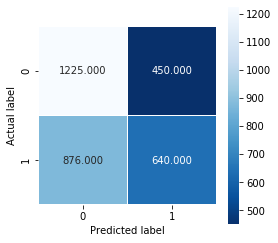

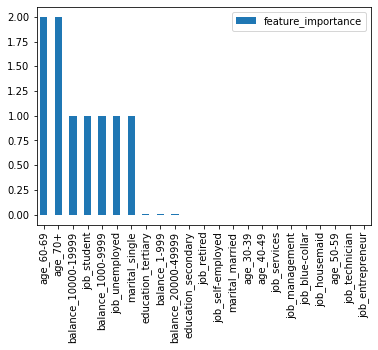

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X3_deposit,y2, random_state=42, test_size=0.3)

SVC(X_train, X_test, y_train, y_test)

## model 3 (y3) prediction of personal loan subscription 


#### baseling of personal loan subscription

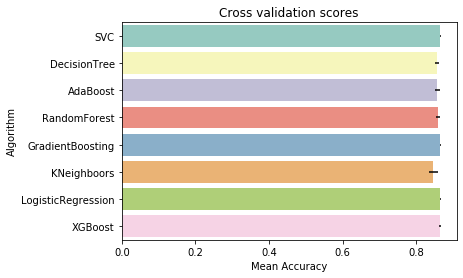

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X,y3, random_state=42, test_size=0.3)
# Modeling step Test differents algorithms 
kfold = StratifiedKFold(n_splits=10)
random_state = 42
classifiers = []
classifiers.append(svm.SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))



cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","KNeighboors","LogisticRegression","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

### XG Boost

#### run the XGBoost with the original cleaning data(X) and  target of term personal loan (y3)

XGB accuracy score for train: 0.869: test: 0.861
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2755
           1       0.23      0.01      0.01       436

    accuracy                           0.86      3191
   macro avg       0.55      0.50      0.47      3191
weighted avg       0.78      0.86      0.80      3191



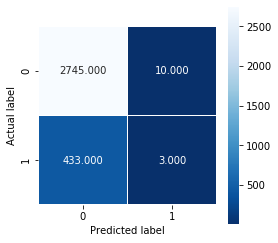

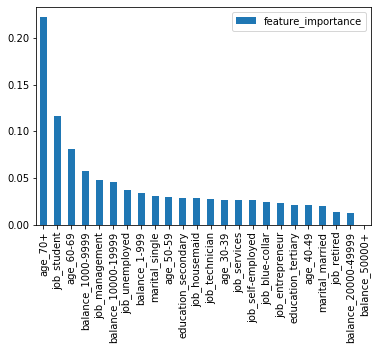

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y3, random_state=42, test_size=0.3)
xgbClassifier(X_train, X_test, y_train, y_test)

### Logistic regression    

#### run the Logistic regression with the original cleaning data(X) and  target of personal loan (y3)

LogisticRegression accuracy score for train: 0.866: test: 0.863
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2755
           1       0.00      0.00      0.00       436

    accuracy                           0.86      3191
   macro avg       0.43      0.50      0.46      3191
weighted avg       0.75      0.86      0.80      3191



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


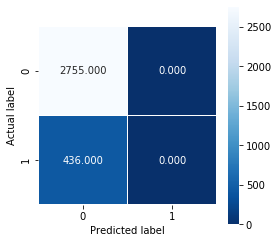

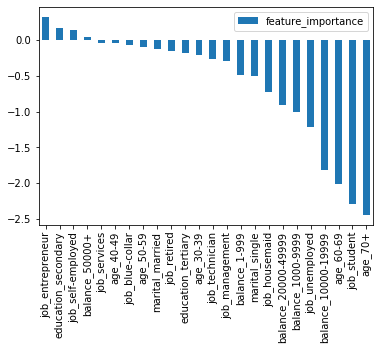

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X,y3, random_state=42, test_size=0.3)
lrregression(X_train, X_test, y_train, y_test)

### SVM

#### run the SVC with the original cleaning data(X) and  target of term personal loan (y3)

SVC accuracy score for train: 0.866: test: 0.863
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2755
           1       0.00      0.00      0.00       436

    accuracy                           0.86      3191
   macro avg       0.43      0.50      0.46      3191
weighted avg       0.75      0.86      0.80      3191



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


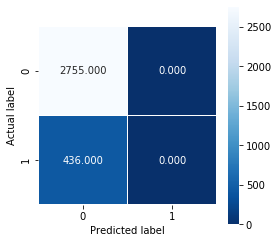

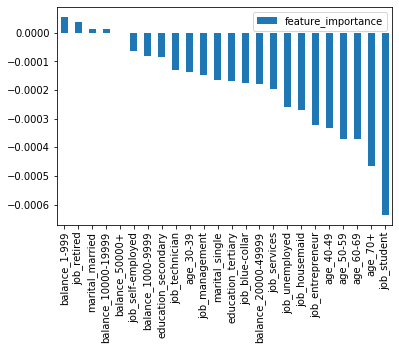

In [63]:
X_train, X_test, y_train, y_test=train_test_split(X,y3, random_state=42, test_size=0.3)
SVC(X_train, X_test, y_train, y_test)

### oversampling 

#### Applying re-sampling strategies to obtain a more balanced data distribution is an effective solution to the imbalance problem

In [64]:
#!pip install imbalanced-learn

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X, y3, random_state=42, test_size=0.3)

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# summarize class distribution
print(Counter(y_train))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))


Counter({0: 6447, 1: 996})
Counter({0: 6447, 1: 6447})


In [66]:
#Apply the oversampling data as the training data to do the RFECV agian
print("Personal loan")
X1_loan=X[rfecv(X_over, y_over, estimator= LogisticRegression())]
print("RFECV selects " +str(len(X1_loan.columns))+ " from 24 features by using LogisticRegression" )
X2_loan=X[rfecv(X_over, y_over, estimator= xgb.XGBClassifier())]
print("RFECV selects " +str(len(X2_loan.columns))+ " from 24 features by using XGBClassifier" )
X3_loan=X[rfecv(X_over, y_over, estimator= svm.SVC(kernel='linear'))]
print("RFECV selects " +str(len(X3_loan.columns))+ " from 24 features by using SVC" )

Personal loan


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFECV selects 15 from 24 features by using LogisticRegression
RFECV selects 22 from 24 features by using XGBClassifier
RFECV selects 8 from 24 features by using SVC


the data shows better result of feature selection

#### run the XGBoost again after oversampling the imbalance data with the original clean data (X) and target of term personal loan (y3)

XGB accuracy score for train: 0.696: test: 0.600
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      2755
           1       0.19      0.58      0.28       436

    accuracy                           0.60      3191
   macro avg       0.54      0.59      0.50      3191
weighted avg       0.80      0.60      0.66      3191



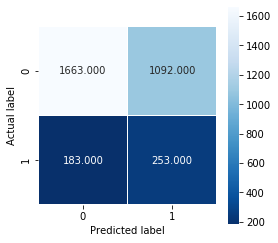

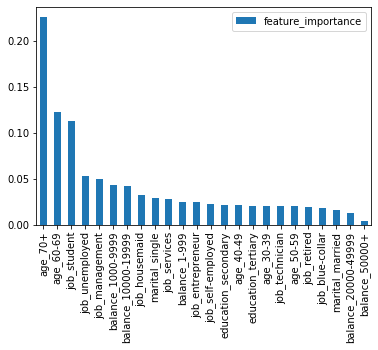

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X, y3, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
xgbClassifier(X_over, X_test, y_over, y_test)

#### Apply feature selection by using RFECV and run the XGBoost model again with the feature selection of data (X2_loan) and target of term personal loan (y3)

XGB accuracy score for train: 0.688: test: 0.589
              precision    recall  f1-score   support

           0       0.90      0.59      0.71      2755
           1       0.18      0.57      0.28       436

    accuracy                           0.59      3191
   macro avg       0.54      0.58      0.49      3191
weighted avg       0.80      0.59      0.65      3191



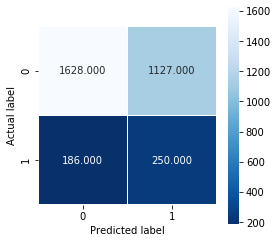

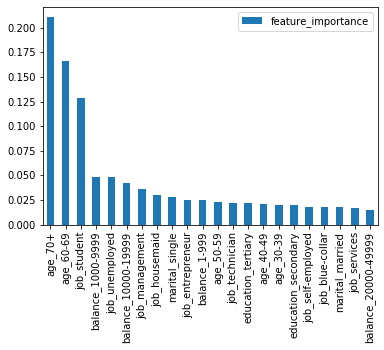

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X2_loan, y3, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
xgbClassifier(X_over, X_test, y_over, y_test)

#### run the Logistic regression again after oversampling the imbalance data with the original clean data (X) and target of term personal loan (y3)

LogisticRegression accuracy score for train: 0.626: test: 0.584
              precision    recall  f1-score   support

           0       0.91      0.57      0.70      2755
           1       0.19      0.64      0.30       436

    accuracy                           0.58      3191
   macro avg       0.55      0.61      0.50      3191
weighted avg       0.81      0.58      0.65      3191



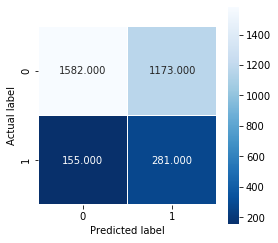

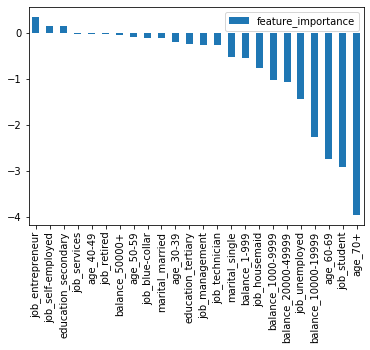

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X, y3, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
lrregression(X_over, X_test, y_over, y_test)

#### Apply feature selection by using RFECV and run the Logistic regression model again with the feature selection of data (X1_loan) and target of term personal loan (y3)

LogisticRegression accuracy score for train: 0.624: test: 0.554
              precision    recall  f1-score   support

           0       0.91      0.53      0.67      2755
           1       0.19      0.68      0.29       436

    accuracy                           0.55      3191
   macro avg       0.55      0.61      0.48      3191
weighted avg       0.81      0.55      0.62      3191



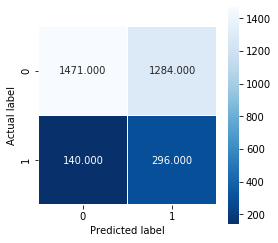

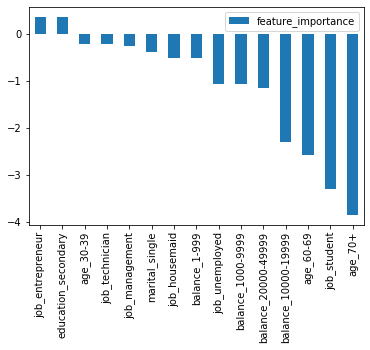

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X1_loan, y3, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
lrregression(X_over, X_test, y_over, y_test)

#### run the SVC again after oversampling the imbalance data with the original clean data (X) and target of term personal loan (y3)

SVC accuracy score for train: 0.620: test: 0.607
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1685
           1       0.60      0.51      0.55      1506

    accuracy                           0.61      3191
   macro avg       0.61      0.60      0.60      3191
weighted avg       0.61      0.61      0.60      3191



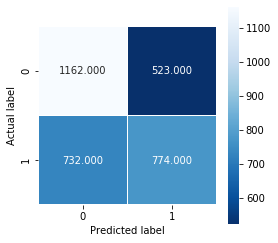

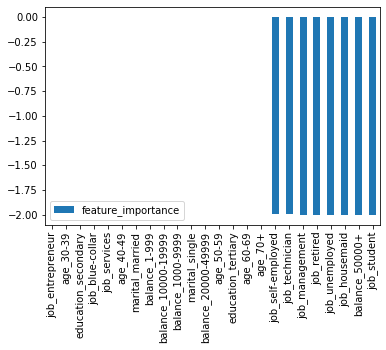

In [71]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
SVC(X_over, X_test, y_over, y_test)

#### Apply feature selection by using RFECV and run the SVC model again with the feature selection of data (X3_loan) and target of term personal loan (y3)

SVC accuracy score for train: 0.578: test: 0.568
              precision    recall  f1-score   support

           0       0.80      0.24      0.37      1685
           1       0.52      0.93      0.67      1506

    accuracy                           0.57      3191
   macro avg       0.66      0.59      0.52      3191
weighted avg       0.67      0.57      0.51      3191



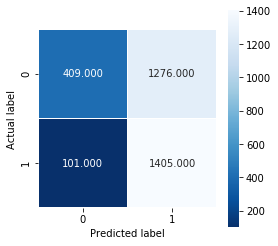

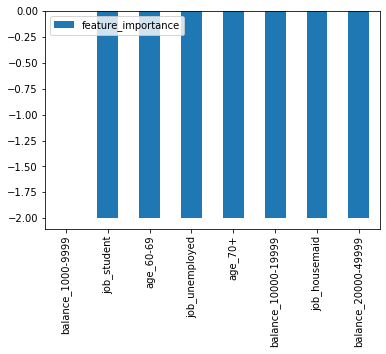

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X3_loan, y, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
SVC(X_over, X_test, y_over, y_test)

# Internal risk asessment (default)

#### baseling of default

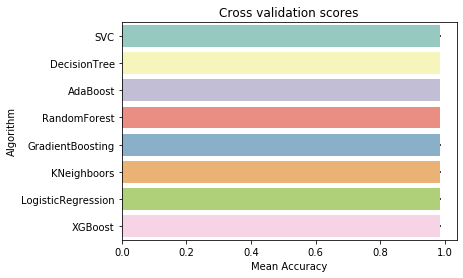

In [73]:
X_train, X_test, y_train, y_test=train_test_split(X,y4, random_state=42, test_size=0.3)
# Modeling step Test differents algorithms 
kfold = StratifiedKFold(n_splits=10)
random_state = 42
classifiers = []
classifiers.append(svm.SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))



cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","KNeighboors","LogisticRegression","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#### run the XGBoost with the original cleaning data(X) and  target of term personal loan (y4)

XGB accuracy score for train: 0.986: test: 0.983
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3136
           1       0.00      0.00      0.00        55

    accuracy                           0.98      3191
   macro avg       0.49      0.50      0.50      3191
weighted avg       0.97      0.98      0.97      3191



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


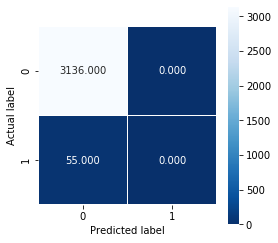

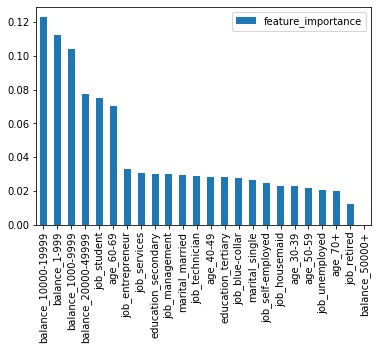

In [74]:
X_train, X_test, y_train, y_test=train_test_split(X,y4, random_state=42, test_size=0.3)
xgbClassifier(X_train, X_test, y_train, y_test)

#### Do the feature selection

In [75]:

X_train, X_test, y_train, y_test=train_test_split(X,y4, random_state=42, test_size=0.3)


print("Default")
X1_default=X[rfecv(X_train,y_train, estimator= LogisticRegression())]
print("RFECV selects " +str(len(X1_default.columns))+ " from 24 features by using LogisticRegression" )
X2_default=X[rfecv(X_train,y_train, estimator= xgb.XGBClassifier())]
print("RFECV selects " +str(len(X2_default.columns))+ " from 24 features by using XGBClassifier" )
X3_default=X[rfecv(X_train,y_train, estimator= svm.SVC(kernel='linear'))]
print("RFECV selects " +str(len(X3_default.columns))+ " from 24 features by using SVC" )


Default
RFECV selects 1 from 24 features by using LogisticRegression
RFECV selects 1 from 24 features by using XGBClassifier
RFECV selects 1 from 24 features by using SVC


#### apply the oversampling method same as model 3

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X, y4, random_state=42, test_size=0.3)

# summarize class distribution
print(Counter(y_train))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))


Counter({0: 7339, 1: 104})
Counter({0: 7339, 1: 7339})


In [77]:
# do feature selection  agian
print("Default")
X1_default=X[rfecv(X_over, y_over, estimator= LogisticRegression())]
print("RFECV selects " +str(len(X1_default.columns))+ " from 24 features by using LogisticRegression" )
X2_default=X[rfecv(X_over, y_over, estimator= xgb.XGBClassifier())]
print("RFECV selects " +str(len(X2_default.columns))+ " from 24 features by using XGBClassifier" )
X3_default=X[rfecv(X_over, y_over, estimator= svm.SVC(kernel='linear'))]
print("RFECV selects " +str(len(X3_default.columns))+ " from 24 features by using SVC" )

Default
RFECV selects 17 from 24 features by using LogisticRegression
RFECV selects 23 from 24 features by using XGBClassifier
RFECV selects 8 from 24 features by using SVC


#### run XGBoost with the oversampling method

XGB accuracy score for train: 0.892: test: 0.816
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3136
           1       0.03      0.29      0.05        55

    accuracy                           0.82      3191
   macro avg       0.51      0.56      0.47      3191
weighted avg       0.97      0.82      0.88      3191



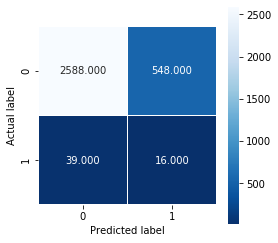

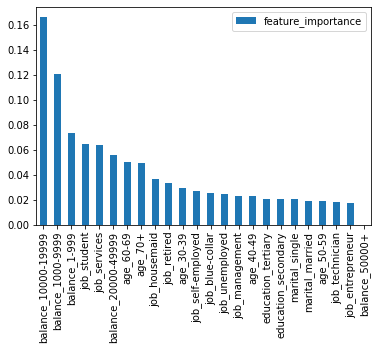

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X, y4, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
xgbClassifier(X_over, X_test, y_over, y_test)

#### Apply feature selection by using RFECV and run the model again (X2_default)

XGB accuracy score for train: 0.892: test: 0.817
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3136
           1       0.03      0.29      0.05        55

    accuracy                           0.82      3191
   macro avg       0.51      0.56      0.48      3191
weighted avg       0.97      0.82      0.88      3191



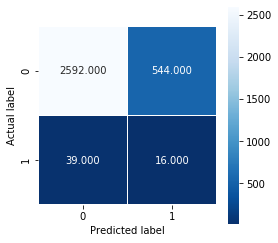

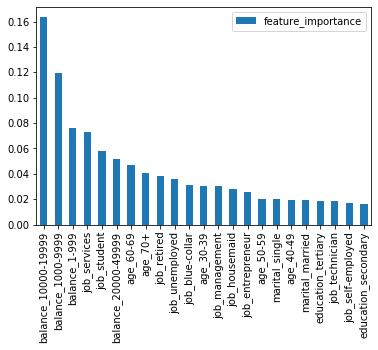

In [79]:
X_train, X_test, y_train, y_test=train_test_split(X2_default, y4, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
xgbClassifier(X_over, X_test, y_over, y_test)

#### run Logistic Regression with the oversampling method

LogisticRegression accuracy score for train: 0.760: test: 0.823
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3136
           1       0.06      0.62      0.11        55

    accuracy                           0.82      3191
   macro avg       0.53      0.72      0.50      3191
weighted avg       0.98      0.82      0.89      3191



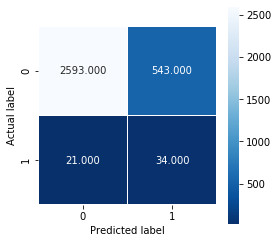

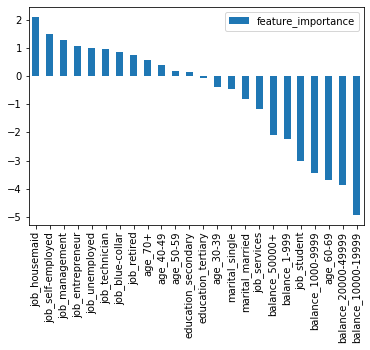

In [80]:
X_train, X_test, y_train, y_test=train_test_split(X, y4, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
lrregression(X_over, X_test, y_over, y_test)

#### Apply feature selection by using RFECV and run the model again (X1_default)

LogisticRegression accuracy score for train: 0.770: test: 0.792
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      3136
           1       0.05      0.65      0.10        55

    accuracy                           0.79      3191
   macro avg       0.52      0.72      0.49      3191
weighted avg       0.98      0.79      0.87      3191



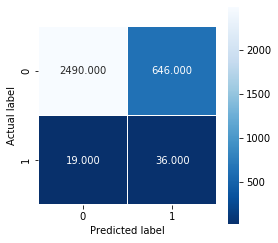

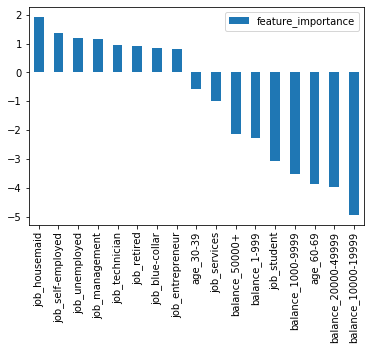

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X1_default, y4, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
lrregression(X_over, X_test, y_over, y_test)

#### run SVC with the oversampling method

SVC accuracy score for train: 0.766: test: 0.846
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3136
           1       0.07      0.60      0.12        55

    accuracy                           0.85      3191
   macro avg       0.53      0.72      0.52      3191
weighted avg       0.98      0.85      0.90      3191



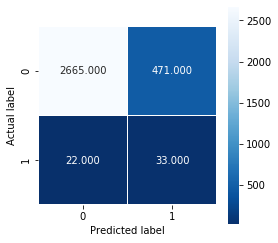

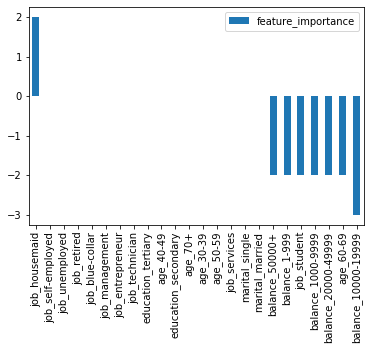

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X, y4, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
SVC(X_over, X_test, y_over, y_test)

#### Apply feature selection by using RFECV and run the model again (X3_default)

SVC accuracy score for train: 0.756: test: 0.846
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3136
           1       0.07      0.60      0.12        55

    accuracy                           0.85      3191
   macro avg       0.53      0.72      0.52      3191
weighted avg       0.98      0.85      0.90      3191



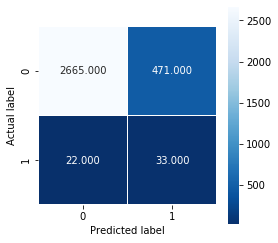

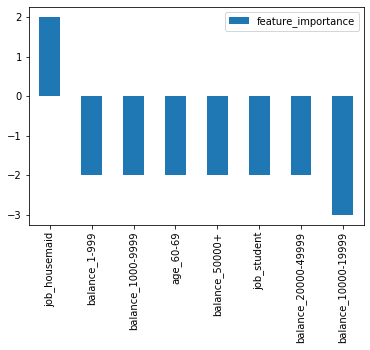

In [83]:
X_train, X_test, y_train, y_test=train_test_split(X3_default, y4, random_state=42, test_size=0.3)
X_over, y_over = oversample.fit_resample(X_train, y_train)
SVC(X_over, X_test, y_over, y_test)

In [ ]:
n 